### Student ID : 18195121
### Name: Vipul Popat


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd

import seaborn as sns

In [2]:
df = pd.read_csv("bank_et1.csv",index_col=['Unnamed: 0'])


In [3]:
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


Suggestion: try PLA on this dataset before using the bank dataset

In [4]:
df.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [6]:
nunique = df.nunique()
nunique


age               68
job               11
marital            3
education          3
default            2
balance         1274
ratio_bal_ln    2000
ratio_ln_inc    2000
housing            2
loan               2
contact            2
day               31
month             12
duration         655
campaign          11
pdays            363
previous          26
poutcome           3
subscribed         2
dtype: int64

## Task 1
### Load bank-et1.csv into a Pandas dataframe. Examine the first few data rows and the last few data rows. Identify an attribute that can be the target/dependable variable for 2-class classification. Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb ” (see section Material, Resources and Online Meetings below)

The attribute that can be the target/dependable varibale for 2-class classifictation is "subscribed" which means whether the customer is subscribed for term deposit

In [7]:
df.isnull().sum() #Check for null values in field

age               0
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [61]:
df['subscribed'].value_counts()

no     1000
yes     999
Name: subscribed, dtype: int64

In [9]:
df['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

In [10]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

#### Most of the account holders are in management, technical or blue collar jobs which explains that their balance is higher compared to assumed lower income groups

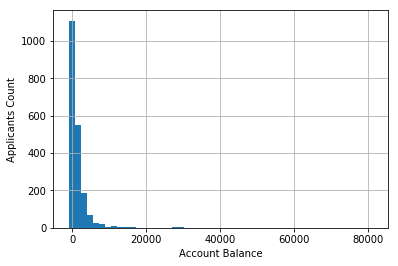

In [11]:
df['balance'].hist(bins=50)
plt.xlabel('Account Balance')
plt.ylabel('Applicants Count')
plt.show()

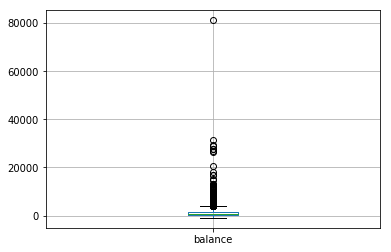

In [12]:
df.boxplot(column='balance')

### The box plot shows that we should be considering the data for balance under 40000 for EDA as there is only one data point > 40000 and that can be considered as an outlier.

In [24]:
df = df.loc[df['balance'] <= 40000]

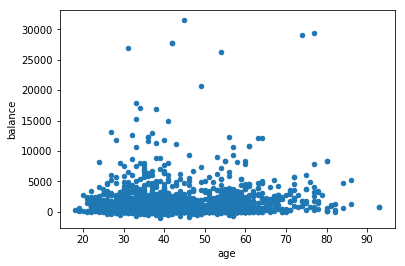

In [87]:
df.plot.scatter(x='age', y='balance')

Based on this scatter plot we can say that balance tends to glide linearly as age grows. We can see the trend clearer with Seaborn's regplot, which draws a line that best fits the relation between two numeric attributes.

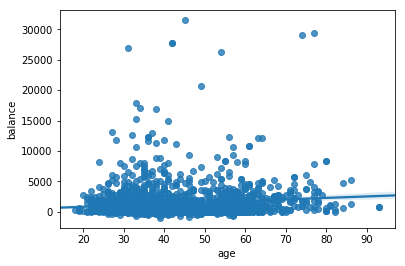

In [63]:
sns.regplot(x='age', y='balance', data=df)

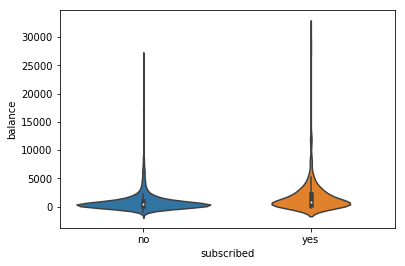

In [64]:
sns.violinplot(x='subscribed', y='balance',data=df)
plt.show()

### This violin plot signifies that as the balance of the as the customer balance increases, the probability of person having a loan is quite less 

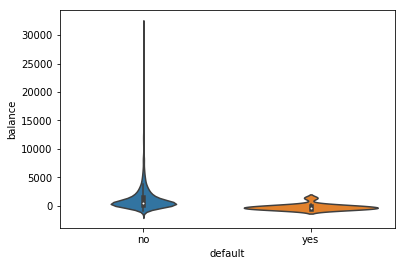

In [26]:
sns.violinplot(x='default', y='balance',data=df)
plt.show()

### This violin plot signifies that as the balance of the as the customer balance increases, the probability of person defaulting is also very less 

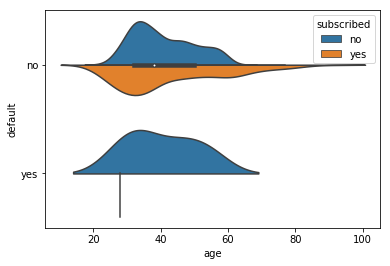

In [54]:
sns.violinplot(df['age'], df['default'], df['subscribed'],split=True)
plt.show()

### The above violit plot shows that the applicants who have defaulted have NOT subscribed to the term deposit whereas the appicants who have not defaulted have an equal distribution of subscribed/nonsubscribed behaviours. Also people would have subscribed in their earlier years to the term deposit

As noted above `loan` is rather a categorical attribute with two categories/values:

- no - the applicant dosent have a personal loan
- yes - the applicant has a personal loan

Let's look at the chances of subscribing to term deposit based if the applicant is on `loan`. 

First, let's take a look at the frequency table for attribute `loan`:

In [71]:
frequency_table = df['loan'].value_counts(ascending=True)
print('Frequency Table for Personal Loan:') 
print(frequency_table)

Frequency Table for Personal Loan:
yes     250
no     1749
Name: loan, dtype: int64


Now we build an Excel-style pivot table for `subscribed` and `loan` with the pivot_table method:

In [80]:
pivot_table = df.pivot_table(values='subscribed',
                       index=['loan'],
                       aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

In [81]:
print(pivot_table)

      subscribed
loan            
no      0.546598
yes     0.172000


Hence the probabilty of applicant with no personal loan subscribing to term deposit is 54% compared to application with a personal loan which is just 17%

Let's plot `loan` and the probability of subscribing to term deposit based on `loan`

Text(0.5, 1.0, 'Applicants by Personal Loan')

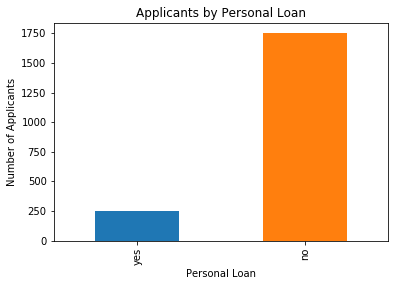

In [82]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('Personal Loan')
plt.ylabel('Number of Applicants')
plt.title('Applicants by Personal Loan')

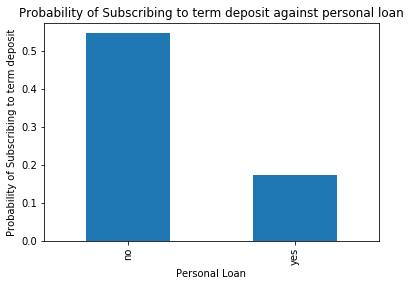

In [84]:
# Plot pivot table
pivot_table.plot(kind='bar')
plt.xlabel('Personal Loan')
plt.ylabel('Probability of Subscribing to term deposit')
plt.title('Probability of Subscribing to term deposit against personal loan')
plt.legend().set_visible(False) # we don't need the default legend

In [46]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 


In [16]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [17]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [18]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [pointOnBoundary(x_min), pointOnBoundary(x_max)]

In [19]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            break
    return weights, iterations

In [20]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)